<a href="https://colab.research.google.com/github/Jessicawwww/Capstone-Experiments/blob/main/Capstone_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting Google Drive onto virtual environment
from google.colab import drive
drive.mount('/content/drive')
# #Installing Base Packages
# !pip3 install utils
# !pip3 install numpy==1.17.0
# !pip3 install scipy==1.4.1

Mounted at /content/drive


In [2]:
#/content/drive/My Drive/ gets to your drive. 
%cd /content/drive/My Drive/Capstone TCS/final

/content/drive/.shortcut-targets-by-id/1DzBEX3L6TIcOWVCpjtc2tmWd8buAK-zO/Capstone TCS/final


In [3]:
%ls

A_1.csv                    E_9.csv   K_24.csv  Q_36.csv  V_50.csv
A_2.csv                    F_12.csv  K_25.csv  Q_37.csv  W_50.csv
A_3.csv                    F_13.csv  L_25.csv  Q_39.csv  W_51.csv
B_3.csv                    F_14.csv  L_26.csv  R_39.csv  W_52.csv
B_4.csv                    G_14.csv  L_27.csv  R_40.csv  X_52.csv
B_5.csv                    G_15.csv  M_27.csv  R_41.csv  X_53.csv
C_5.csv                    G_16.csv  M_28.csv  S_41.csv  X_54.csv
C_6.csv                    H_16.csv  M_30.csv  S_42.csv  Y_54.csv
C_7.csv                    H_17.csv  N_30.csv  S_43.csv  Y_55.csv
Capstone-Experiment.ipynb  H_18.csv  N_31.csv  T_43.csv  Y_56.csv
Capstone.ipynb             I_18.csv  N_32.csv  T_44.csv  Z_56.csv
D_7.csv                    I_19.csv  O_32.csv  T_45.csv  Z_57.csv
D_8.csv                    I_21.csv  O_33.csv  U_45.csv  Z_59.csv
D_9.csv                    J_21.csv  O_34.csv  U_46.csv
deployed_model.joblib      J_22.csv  P_34.csv  U_48.csv
E_10.csv                   J_2

## EDA (to be continued)

In [4]:
import pandas as pd
import glob

schema = {
    'song_hotttnesss': float,
    'artist_familiarity': float,
    'artist_hotttnesss': float,
    'artist_id': str,
    'artist_latitude': float,
    'artist_location': str,
    'artist_longitude': float,
    'artist_name': str,
    'title': str,
    'danceability': float,
    'duration': float,
    'end_of_fade_in': float,
    'energy': float,
    'key': float,
    'key_confidence': float,
    'loudness': float,
    'mode': float,
    'mode_confidence': float,
    'start_of_fade_out': float,
    'tempo': float,
    'time_signature': float,
    'time_signature_confidence': float,
    'artist_terms': str,
    'artist_terms_freq': str,
    'artist_terms_weight': str,
    'year': float
}

# read each CSV file into a separate DataFrame, and concatenate them
cols=list(schema.keys())
temp=[]
for csv_file in glob.glob('*.csv'):
    temp_df = pd.read_csv(csv_file,names=cols)
    temp.append(temp_df)
    
df = pd.concat(temp, ignore_index=True)

In [5]:
len(df)

581965

In [6]:
df.columns

Index(['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_name', 'title', 'danceability', 'duration', 'end_of_fade_in',
       'energy', 'key', 'key_confidence', 'loudness', 'mode',
       'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature',
       'time_signature_confidence', 'artist_terms', 'artist_terms_freq',
       'artist_terms_weight', 'year'],
      dtype='object')

In [7]:
df.danceability.value_counts()

0.0    581965
Name: danceability, dtype: int64

In [8]:
df.energy.value_counts()

0.0    581965
Name: energy, dtype: int64

In [9]:
# drop empty features
df.drop(['danceability','energy'],axis=1,inplace=True)

In [10]:
df.head()

,song_hotttnesss,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_name,title,duration,...,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_terms,artist_terms_freq,artist_terms_weight,year
0,0.768139,0.797571,0.562733,ARSASTM1187FB52759,NaN,NaN,NaN,Hit The Lights,Breathe In,186.95791,...,1,0.846,177.575,92.426,4,0.554,"['pop punk', 'emo', 'indie rock', 'rock', 'pun...","[0.999373773601825, 1.0, 0.999373773601825, 0....","[1.0, 0.9357329466861807, 0.8862493667839598, ...",2008
1,0.652836,0.929030,0.750427,ARR3ONV1187B9A2F59,54.31407,UK,-2.23001,Muse,Bedroom Acoustics,156.96934,...,0,0.524,142.286,127.547,1,0.168,"['art rock', 'piano rock', 'indie pop', 'alter...","[0.9123026880588256, 0.8835195033365459, 0.985...","[1.0, 0.9998263469850132, 0.9837746658376495, ...",0
2,0.536789,0.814014,0.727709,ARC4W081187B9ACDBD,35.14968,"Memphis, TN",-90.04892,Skillet,Looking For Angels (Album Version),271.30730,...,0,0.590,253.991,90.046,4,0.912,"['christian rock', 'rock', 'alternative', 'con...","[0.9446169630278316, 1.0, 0.8590184926657504, ...","[1.0, 0.8191646107325354, 0.7417081604435652, ...",2006
3,0.565742,0.726409,0.493950,ARVFF0Y1187B9AC3CA,NaN,"Stockton, CA",NaN,Pavement,Hands Off The Bayou,163.73506,...,1,0.000,161.582,107.917,4,0.648,"['noise pop', 'alternative rock', 'indie rock'...","[0.9999421019508828, 1.0, 0.9999855298290615, ...","[1.0, 0.8538280670641224, 0.8452680132770719, ...",2004
4,0.447136,0.743284,0.461002,ARFN3551187FB4C930,NaN,NaN,NaN,The Turtles,The Story Of Rock And Roll,180.55791,...,1,0.521,165.790,117.996,1,0.000,"['folk rock', ""rock 'n roll"", 'surf music', 'd...","[1.0, 0.7674699865828425, 0.7673871184623114, ...","[1.0, 0.8619570370128912, 0.8618868797089401, ...",1993


In [11]:
for col in df.columns:
    num_nans = df[col].isnull().sum()
    print(f"Number of NaN values in column '{col}': {num_nans}")

Number of NaN values in column 'song_hotttnesss': 0
Number of NaN values in column 'artist_familiarity': 54
Number of NaN values in column 'artist_hotttnesss': 0
Number of NaN values in column 'artist_id': 0
Number of NaN values in column 'artist_latitude': 369135
Number of NaN values in column 'artist_location': 269325
Number of NaN values in column 'artist_longitude': 369135
Number of NaN values in column 'artist_name': 0
Number of NaN values in column 'title': 2
Number of NaN values in column 'duration': 0
Number of NaN values in column 'end_of_fade_in': 0
Number of NaN values in column 'key': 0
Number of NaN values in column 'key_confidence': 0
Number of NaN values in column 'loudness': 0
Number of NaN values in column 'mode': 0
Number of NaN values in column 'mode_confidence': 0
Number of NaN values in column 'start_of_fade_out': 0
Number of NaN values in column 'tempo': 0
Number of NaN values in column 'time_signature': 0
Number of NaN values in column 'time_signature_confidence'

We define a song to be popular if its song_hotttnesss value is above average,and assign a label called popularity

In [12]:
import numpy as np
pop_avg=np.mean(df['song_hotttnesss'])
df['popularity']= df.song_hotttnesss.map(lambda x: 1 if x > pop_avg else 0)

**Here is one way to split the data if you want a pre/post deploy differentiation**

In [13]:
# define the three columns to split by
split_cols = ['artist_latitude', 'artist_longitude']


# Split the dataframe into two parts based on the null values in split_cols
df_notnull = df[df[split_cols].notnull().all(axis=1)]
df_null = df[~df[split_cols].notnull().all(axis=1)]

In [14]:
len(df_null)

369135

In [15]:
len(df_notnull)

212830

In [16]:
df_notnull.columns

Index(['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_name', 'title', 'duration', 'end_of_fade_in', 'key',
       'key_confidence', 'loudness', 'mode', 'mode_confidence',
       'start_of_fade_out', 'tempo', 'time_signature',
       'time_signature_confidence', 'artist_terms', 'artist_terms_freq',
       'artist_terms_weight', 'year', 'popularity'],
      dtype='object')

In [17]:
labels = ['artist_familiarity', 'artist_hotttnesss', 'duration', 'end_of_fade_in', 'key', 
            'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 
            'time_signature', 'time_signature_confidence','year', 'artist_latitude', 'artist_longitude','popularity']

In [18]:
#Drop 'artist_familiarity' NA
pre_data = df_notnull[labels]
post_data = df_null[labels]
post_data[['artist_latitude', 'artist_longitude']] = post_data[['artist_latitude', 'artist_longitude']].fillna(0)
pre_data = pre_data.dropna()
post_data = post_data.dropna()

<ipython-input-18-9bc76df44835>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_data[['artist_latitude', 'artist_longitude']] = post_data[['artist_latitude', 'artist_longitude']].fillna(0)


In [19]:
len(labels)

17

In [20]:
import matplotlib.pyplot as plt

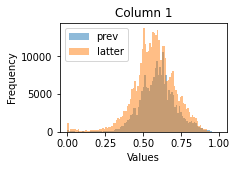

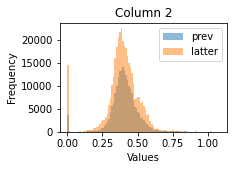

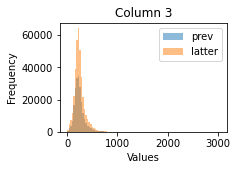

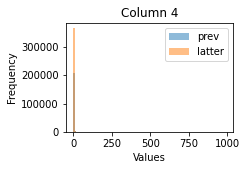

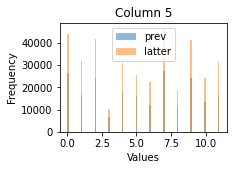

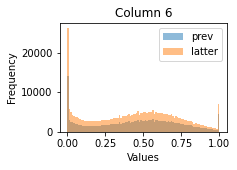

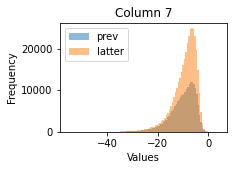

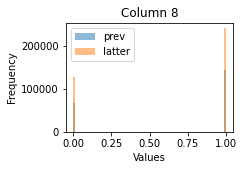

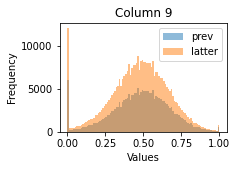

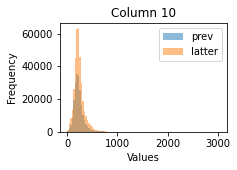

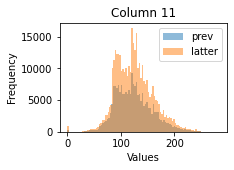

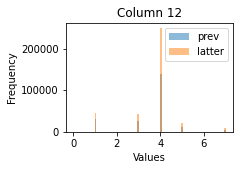

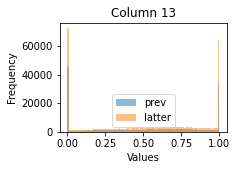

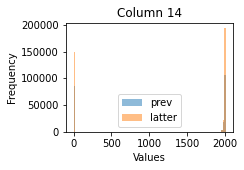

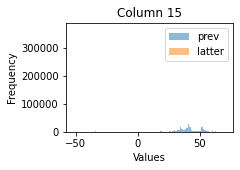

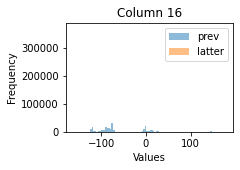

In [21]:
for i in range(0,16):
    plt.figure(figsize=(3,2))
    plt.hist(pre_data[labels[i]], bins = 100, alpha = 0.5)
    plt.hist(post_data[labels[i]], bins = 100, alpha = 0.5)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Column '+ str(i+1))
    plt.legend(['prev', 'latter'])
    plt.show()

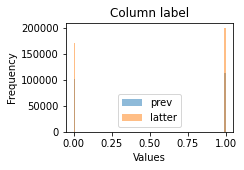

In [22]:
#Label distribution
plt.figure(figsize=(3,2))
plt.hist(pre_data['popularity'], bins = 100, alpha = 0.5)
plt.hist(post_data['popularity'], bins = 100, alpha = 0.5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Column label')
plt.legend(['prev', 'latter'])
plt.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import joblib

## Training demo

We define a song to be popular if its song_hotttnesss value is above average,

In [24]:
numeric_features= ['artist_familiarity', 'artist_hotttnesss', 'duration', 'end_of_fade_in', 'key', 
            'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 
            'time_signature', 'time_signature_confidence','year', 'artist_latitude', 'artist_longitude']
label= ['popularity']

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Split data into training and testing sets
df_sample=pre_data[numeric_features+label].dropna()
X = df_sample[numeric_features]
y = df_sample[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Instantiate a Random Forest Classifier with 100 estimators
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = rf.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

<ipython-input-26-426de593d459>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Random Forest Classifier Accuracy: 0.7833938976254621


In [27]:
#save model
import joblib
joblib.dump(rf, "./deployed_model.joblib")

['./deployed_model.joblib']

In [28]:
deployed_model = joblib.load("./deployed_model.joblib")

In [29]:
deployed_model

RandomForestClassifier(random_state=42)

In [30]:
print(len(pre_data))
print(len(post_data))

212812
369099


In [31]:
# Predict the labels of the test data
y_pred_tr = deployed_model.predict(X_train)
y_pred_test = deployed_model.predict(X_test)

# Compute accuracy score
train_score = accuracy_score(y_train, y_pred_tr) * 100
print(f"Train accuracy score: {train_score:.2f}%")
test_score = accuracy_score(y_test, y_pred_test) * 100
print(f"Test accuracy score: {test_score:.2f}%")

Train accuracy score: 100.00%
Test accuracy score: 78.34%


In [32]:
np.unique(y_test)

array([0, 1])

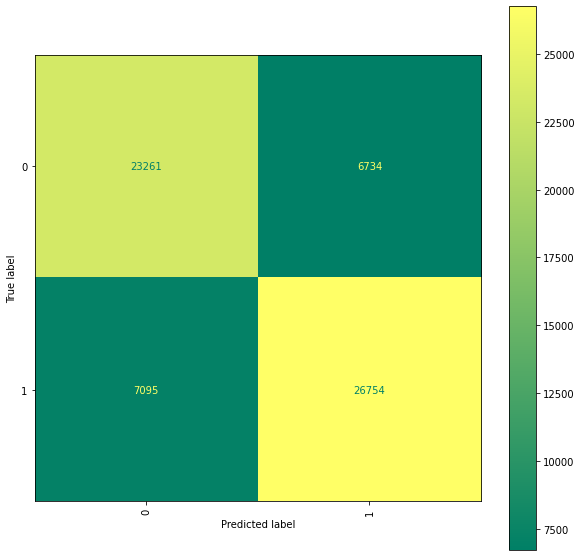

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[0,1]
)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap="summer")

plt.show()

In [34]:
pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True)).T

,precision,recall,f1-score,support
0,0.766274,0.775496,0.770857,29995.000000
1,0.798913,0.790393,0.794630,33849.000000
accuracy,0.783394,0.783394,0.783394,0.783394
macro avg,0.782593,0.782944,0.782744,63844.000000
weighted avg,0.783578,0.783394,0.783461,63844.000000


## Change of Data Schema

In [35]:
def test_data_schema(pre_data, post_data):
    assert set(pre_data.columns) == set(post_data.columns),"Data Schema shifted."

## Amount of new data

In [36]:
new_data_func = lambda pre, post: True if len(post)>len(pre) else False

In [38]:
# new_data_func(X, X_post)

## Concept Drift: shift in relationship between X and y

In [40]:
print(len(post_data), len(pre_data))

369099 212812


In [41]:
X_post = post_data[numeric_features]
y_post = post_data[label]
y_pred_post = deployed_model.predict(X_post)

# Compute accuracy score
post_score = accuracy_score(y_post, y_pred_post) * 100
print(f"Post data accuracy score: {post_score:.2f}%")

Post data accuracy score: 72.08%


In [42]:
print(len(X_train), len(X_test), len(X_post))

148968 63844 369099


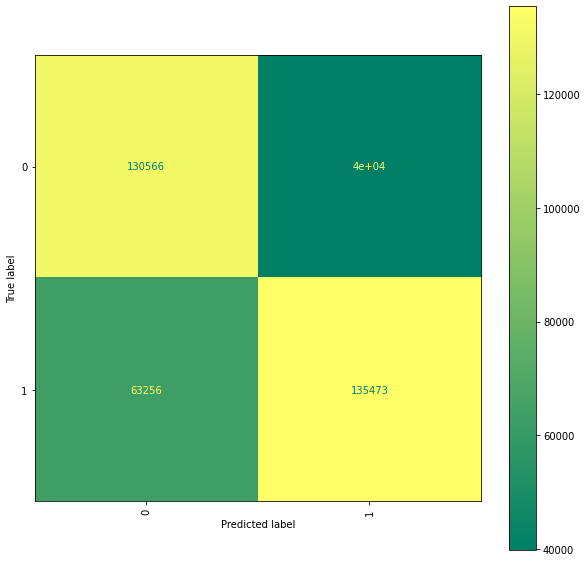

In [43]:
cm_post = confusion_matrix(y_post, y_pred_post)
disp_post = ConfusionMatrixDisplay(
    confusion_matrix=cm_post,
    display_labels=[0,1]
)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp_post = disp_post.plot(xticks_rotation='vertical', ax=ax, cmap="summer")

plt.show()

In [44]:
pd.DataFrame(classification_report(y_post, y_pred_post, output_dict=True)).T

,precision,recall,f1-score,support
0,0.673639,0.766367,0.717017,170370.00000
1,0.772908,0.681697,0.724443,198729.00000
accuracy,0.720780,0.720780,0.720780,0.72078
macro avg,0.723273,0.724032,0.720730,369099.00000
weighted avg,0.727087,0.720780,0.721015,369099.00000


In [45]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
def post_score(y_true, y_pred, threshold, metric_num):
  if metric_num == 1:
    return True if f1_score(y_true, y_pred) < threshold else False
  elif metric_num == 2:
    return True if accuracy_score(y_true, y_pred) < threshold else False
  elif metric_num == 3:
    return True if precision_score(y_true, y_pred) < threshold else False
  else:
    return True if recall_score(y_true, y_pred) < threshold else False

In [46]:
## test case
y_true = [0, 1, 1, 0, 1, 1]
y_pred = [0, 1, 1, 0, 0, 1]
threshold = 0.7151669958566613
post_score(y_true, y_pred, threshold, 1)

False

In [47]:
new_f1 = f1_score(y_test, y_pred_test)*(1-0.1)
print(new_f1)

0.7151669958566613


In [48]:
# post_score(y_post, y_pred_post, new_f1)

TypeError: ignored

### Pairwise Correlation

In [ ]:
import seaborn as sns
corr=X_latter.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [49]:
corr = X_train.drop(['artist_latitude', 'artist_longitude'], axis=1).corr()
corr_post = X_post.drop(['artist_latitude', 'artist_longitude'], axis=1).corr()

In [50]:
len(corr.to_numpy())

14

In [51]:
from numpy.linalg import norm
similaritys = []
for i in range(14):
  A = corr.to_numpy()[i]
  B = corr_post.to_numpy()[i]
  cosine = np.dot(A, B)/ (norm(A)*norm(B))
  similaritys.append(cosine)

In [52]:
[s for s in similaritys if s < 0.99]

[]

In [53]:
def corr_cosine_similarity(corr1, corr2, threshold):
  """compute the cosine similarity between two correlation coefficient dataframe
  corr1, corr2: dataframe
  threshold: for detecting cosine similarity between two arrays
  return if any cosine similarity falls below 0.99
  """
  from numpy.linalg import norm
  A = corr.to_numpy()
  B = corr_post.to_numpy()
  for i in range(len(A)):
    a = A[i]
    b = B[i]
    cosine = np.dot(a, b)/ (norm(a)*norm(b))
    if cosine < threshold:
      return True
    return False

In [54]:
corr_cosine_similarity(corr, corr_post, 0.99)

False

In [55]:
# c = corr.mask(np.eye(len(corr), dtype=bool)).abs()
# s = c.unstack()
# so = s.sort_values(kind="quicksort", ascending=False)
# so[so>0.6]

In [56]:
# corr = X_train.drop(['artist_latitude', 'artist_longitude'], axis=1).corr()
# m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.6).any()

In [57]:
# raw = corr.loc[m, m]
# raw

In [58]:
# raw_post = corr_post.loc[m, m]
# raw_post

In [59]:
# similarity = pairwise.cosine_similarity(raw, raw_post)
# similarity

## Covariate Shift: Shift in the independent variables. 
### 1. KS-Test（two sample）
H0：two samples come from the same distribution.

H1：two samples' distribution are not the same.

If the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the two sample datasets do not come from the same distribution.

In [60]:
X_prev = pre_data.drop(columns = label)
X_post = post_data.drop(columns = label)

In [61]:
from scipy.stats import ks_2samp
#return True means the program need to retrain
#k: at least k number of features are not from the same distribution
#X_prev,X_latter: dataframe
def KS_test(X_prev, X_latter, k):
    p_value = {'reject':0, 'accept':0}
    for i in X_prev.columns:
        p = ks_2samp(np.array(X_prev[i]), np.array(X_latter[i])).pvalue
        if p < 0.05:
            p_value['reject'] +=1
        else:
            p_value['accept'] +=1
    if p_value['reject'] > k:
        return True
    else: 
        return False

In [62]:
#EXP: need to be retained
KS_test(X_prev, X_post, 2)

True

In [78]:
corr

,artist_familiarity,artist_hotttnesss,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,year,artist_latitude,artist_longitude
artist_familiarity,1.000000,0.716705,0.004162,0.011222,0.006437,-0.021694,0.177386,-0.028800,-0.015703,0.004967,0.039050,0.040323,0.034265,0.251790,0.053932,0.039015
artist_hotttnesss,0.716705,1.000000,0.005271,0.012030,0.001667,-0.009390,0.111403,-0.021764,-0.004045,0.005750,0.022886,0.028815,0.026576,0.224566,0.038215,0.050710
duration,0.004162,0.005271,1.000000,0.096303,0.009933,0.017132,-0.037522,-0.073457,-0.006077,0.997860,-0.032984,0.097128,0.113685,-0.019225,0.027023,0.061942
end_of_fade_in,0.011222,0.012030,0.096303,1.000000,-0.000546,-0.004576,-0.075993,-0.004353,0.000884,0.093450,-0.026768,-0.006158,0.002384,0.015034,0.015334,0.023469
key,0.006437,0.001667,0.009933,-0.000546,1.000000,-0.039612,0.029444,-0.177977,-0.036917,0.010667,0.014968,0.006718,0.002414,0.001346,0.000250,0.005668
key_confidence,-0.021694,-0.009390,0.017132,-0.004576,-0.039612,1.000000,-0.003447,0.140454,0.776233,0.014592,0.042646,-0.087834,-0.050176,-0.008010,-0.008625,-0.015761
loudness,0.177386,0.111403,-0.037522,-0.075993,0.029444,-0.003447,1.000000,-0.021673,-0.031595,-0.030161,0.179931,0.094719,0.021145,0.078323,0.022899,0.042097
mode,-0.028800,-0.021764,-0.073457,-0.004353,-0.177977,0.140454,-0.021673,1.000000,0.139490,-0.073546,-0.008511,-0.037339,-0.043729,-0.014373,-0.014249,-0.041298
mode_confidence,-0.015703,-0.004045,-0.006077,0.000884,-0.036917,0.776233,-0.031595,0.139490,1.000000,-0.010354,-0.003506,-0.056697,-0.030349,0.000622,-0.003905,-0.013505
start_of_fade_out,0.004967,0.005750,0.997860,0.093450,0.010667,0.014592,-0.030161,-0.073546,-0.010354,1.000000,-0.029722,0.096372,0.111801,-0.020987,0.026604,0.061894


<Axes: >

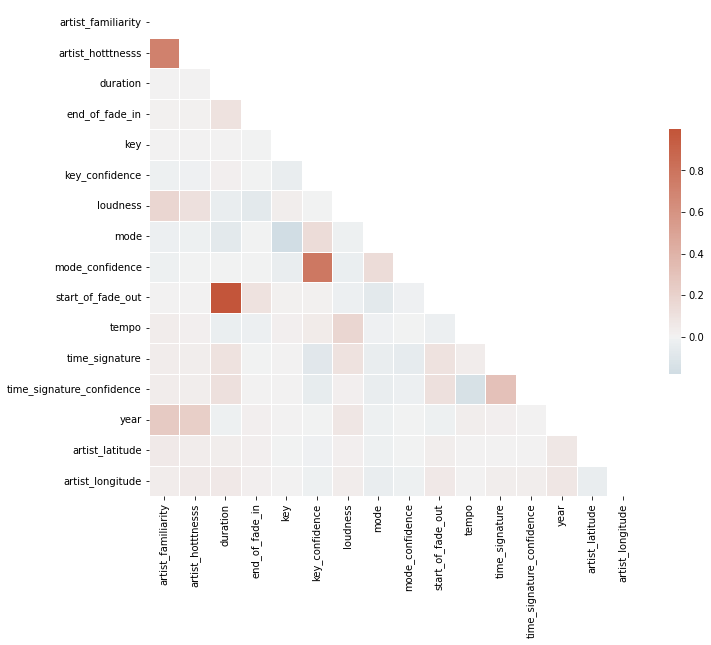

In [79]:
import seaborn as sns
corr=X_prev.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 2. PSI
Interpretation

PSI < 0.1: no significant population change

PSI < 0.2: moderate population change

PSI >= 0.2: significant population change


In [63]:
#Reference: https://github.com/mwburke/population-stability-index/blob/master/psi.py

def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):
    '''Calculate the PSI (population stability index) across all variables
    Args:
       expected: numpy matrix of original values
       actual: numpy matrix of new values, same size as expected
       buckettype: type of strategy for creating buckets, bins splits into even splits, quantiles splits into quantile buckets
       buckets: number of quantiles to use in bucketing variables
       axis: axis by which variables are defined, 0 for vertical, 1 for horizontal
    Returns:
       psi_values: ndarray of psi values for each variable
    Author:
       Matthew Burke
       github.com/mwburke
       worksofchart.com
    '''

    def psi(expected_array, actual_array, buckets):
        '''Calculate the PSI for a single variable
        Args:
           expected_array: numpy array of original values
           actual_array: numpy array of new values, same size as expected
           buckets: number of percentile ranges to bucket the values into
        Returns:
           psi_value: calculated PSI value
        '''

        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input


        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100

        if buckettype == 'bins':
            breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        elif buckettype == 'quantiles':
            breakpoints = np.stack([np.percentile(expected_array, b) for b in breakpoints])


        expected_percents = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_percents = np.histogram(actual_array, breakpoints)[0] / len(actual_array)

        def sub_psi(e_perc, a_perc):
            '''Calculate the actual PSI value from comparing the values.
               Update the actual value to a very small number if equal to zero
            '''
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)

        psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))

        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[axis])
        print(psi_values)
    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = psi(expected, actual, buckets)
        elif axis == 0:
            psi_values[i] = psi(expected[:,i], actual[:,i], buckets)
        elif axis == 1:
            psi_values[i] = psi(expected[i,:], actual[i,:], buckets)

    return(psi_values)

In [64]:
#return True means the program need to retrain
#k: at least k number of features has shift
def PSI_covariate(X_prev, X_latter, k):
    value = {'reject':0, 'accept':0}
    for i in X_prev.columns:
        v = calculate_psi(np.array(X_prev[i]), np.array(X_latter[i]))
        if v < 0.1:
            value['reject'] +=1
        else:
            value['accept'] +=1
    if value['reject'] > k:
        return True
    else: 
        return False

In [65]:
#EXP: need to be retained
PSI_covariate(X_prev, X_post, 2)

<ipython-input-63-fd908a9a0fd6>:59: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))


True

## 3. Z-Score


In [66]:
from scipy.stats import zscore

def Z_score_covariate(X_prev, X_post, k):
    # calculate Z-scores of the source and target datasets
    z_pre = zscore(X_prev)
    z_post = zscore(X_post)
    
    p_value = {'reject':0, 'accept':0}
    for i in range(z_pre.shape[1]):
        # perform a Kolmogorov-Smirnov test on the Z-score distributions
        p = ks_2samp(np.array(z_pre[:,i]), np.array(z_post[:,i])).pvalue
        if p < 0.05:
            p_value['reject'] +=1
        else:
            p_value['accept'] +=1
    if p_value['reject'] > k:
        return True
    else: 
        return False

In [67]:
#EXP: need to be retained
# Z_score_covariate(X_prev, X_post, 2)

InvalidIndexError: ignored

## Prior Probability Shift: shift of the target variable
### 1. KS-Test（two sample）
H0：two samples come from the same distribution.

H1：two samples' distribution are not the same.

If the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the two sample datasets do not come from the same distributio

In [68]:
y_prev = pre_data['popularity']
y_post = post_data['popularity']

In [69]:
from scipy.stats import ks_2samp
#return True means the program need to retrain, check on the distribution of y
def KS_test_prior(y_prev, y_post):
    p = ks_2samp(np.array(y_prev), np.array(y_post)).pvalue
    if p < 0.05:
        return False
    else:
        return True

In [70]:
KS_test_prior(y_prev, y_post)

False

### 2. PSI

In [71]:
#return True means the program need to retrain, check on the distribution of y
def PSI_prior(y_prev, y_post):
    value = calculate_psi(np.array(y_prev), np.array(y_post))
    #no significant population change
    if value < 0.1:
        return False
    else:
        return True

In [72]:
#EXP: no need to be retained
PSI_prior(y_prev, y_post)

<ipython-input-63-fd908a9a0fd6>:59: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))


False

### 3. Z-score

In [73]:
from scipy.stats import zscore

def Z_score_prior(y_prev, y_post):
    # calculate Z-scores of the source and target datasets
    z_pre = zscore(y_prev)
    z_post = zscore(y_post)
    
    p = ks_2samp(np.array(z_pre), np.array(z_post)).pvalue

    if p < 0.05:
        return False
    else: 
        return True

In [74]:
#EXP: no need to be retained
Z_score_prior(y_prev, y_post)

False

In [75]:
merged_df = pre_data.append(post_data, ignore_index=True)
merged_df.head()

<ipython-input-75-6ed59925da31>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = pre_data.append(post_data, ignore_index=True)


,artist_familiarity,artist_hotttnesss,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,year,artist_latitude,artist_longitude,popularity
0,0.929030,0.750427,156.96934,0.322,4,0.772,-20.816,0,0.524,142.286,127.547,1,0.168,0,54.31407,-2.23001,1
1,0.814014,0.727709,271.30730,2.781,2,0.593,-3.683,0,0.590,253.991,90.046,4,0.912,2006,35.14968,-90.04892,1
2,0.566280,0.313092,164.36200,0.218,5,0.777,-6.419,1,0.620,157.931,192.261,1,0.000,2002,53.47960,-2.24881,1
3,0.494403,0.364806,53.78567,0.000,9,0.000,-17.917,0,0.000,53.786,66.362,4,0.908,2007,46.81320,8.22395,0
4,0.384967,0.304245,156.96934,0.000,1,0.187,-9.054,1,0.057,146.860,116.329,4,1.000,1968,39.60856,-75.83013,0


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged_df.drop(columns = ['popularity']), merged_df['popularity'], test_size=0.3, random_state=42)

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
## random forest classfier



In [ ]:
## Xgboost



In [1]:
## Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

NameError: ignored

In [ ]:
## KNN
# Use the KNN classifier to fit data:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

In [ ]:
# cross validation
metric = accuracy_score
knn_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring=metric)
# rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring=metric)
# svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring=metric)

print("KNN mean score:", knn_scores.mean())
# print("Random Forest mean score:", rf_scores.mean())
# print("SVM mean score:", svm_scores.mean())

In [ ]:
best_model = None
best_score = 0

if lr_score > best_score:
    best_score = lr_score
    best_model = lr_model
    
if rf_score > best_score:
    best_score = rf_score
    best_model = rf_model
    
if svm_score > best_score:
    best_score = svm_score
    best_model = svm_model

In [ ]:
## use the best model and fine tuning the parameters
from sklearn.model_selection import RandomizedSearchCV

params = {'learning_rate':[0.1,0.2,0.3],
          'max_depth':[2,4,5],
          'max_features':[0.2,0.25,0.3,0.35,0.4]}

param_space = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'gamma': [0, 0.1, 0.2]
}

random_search = RandomizedSearchCV(
    estimator=best_model,
    param_distributions= params,
    n_iter=num_iterations,
    scoring=metric,
    cv=5
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_